In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timezone, timedelta
from io import StringIO
import geohash2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")

## Extraction - PM25 Last 8 Hours

In [2]:
# Kedro Catalog
pm25_last_hour = catalog.load('pm25_last_hour')
# Data Frame Sensors
pm25_last_hour.head()

2022-09-10 12:38:12,263 - kedro.io.data_catalog - INFO - Loading data from `pm25_last_hour` (CSVDataSet)...


,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-05 14:34:30-05:00,20.625000,20.403361,22.369748,26.972973,30.030303,25.555556,16.848739,7.416667,19.350877,39.441667,29.707965,25.777778,25.285714
1,2022-09-05 15:34:30-05:00,20.175000,20.075630,20.764706,25.844828,26.931373,25.550847,17.672269,7.720339,19.452174,39.770642,30.155172,25.378151,25.474576
2,2022-09-05 16:34:30-05:00,20.883333,22.008333,21.826087,28.647059,24.864407,25.364407,18.075000,7.482456,21.422414,42.401786,34.887931,27.459459,25.403361
3,2022-09-05 17:34:30-05:00,21.862069,21.605263,23.203540,28.521739,20.973451,25.965217,20.112069,4.639640,11.300000,25.596154,32.184211,17.009434,26.096491
4,2022-09-05 18:34:30-05:00,22.025210,22.820513,24.872881,28.907563,14.803419,18.470588,12.239316,3.491379,10.336283,18.655172,29.198198,12.963303,21.186441


In [3]:
# Check Data Types
pm25_last_hour.dtypes

DATETIME         object
TANGARA_2BBA    float64
TANGARA_14D6    float64
TANGARA_1CE2    float64
TANGARA_1FCA    float64
TANGARA_2492    float64
TANGARA_2FF6    float64
TANGARA_48C6    float64
TANGARA_4D7A    float64
TANGARA_532E    float64
TANGARA_EA06    float64
TANGARA_F1AE    float64
TANGARA_FAC6    float64
TANGARA_06BE    float64
dtype: object

## Descriptive Statistics

In [4]:
# Describe Data
pm25_last_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,7.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.325800,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
std,5.380139,5.648283,6.808559,1.746974,6.082966,5.856329,5.811612,2.842651,8.238649,16.973664,11.381201,10.409445,5.680177
min,11.553398,14.211864,13.525000,25.844828,14.803419,17.767241,7.359649,2.364407,6.721739,12.966667,12.274510,9.666667,17.550847
25%,16.777083,20.321429,21.560742,27.747356,22.531780,23.104627,10.987500,2.857110,8.268553,14.903484,17.463007,10.891277,21.148164
50%,21.372701,23.868506,25.281573,28.647059,26.317797,25.795109,16.845203,4.788846,14.142788,28.766810,29.453081,19.430172,25.438969
75%,24.925000,27.645209,29.999620,29.562477,29.885781,29.120089,20.939890,7.875724,24.363551,47.478992,38.426029,30.458387,29.193147
max,31.416667,36.269565,39.508475,30.914894,38.922414,38.241667,25.282051,9.773913,30.801802,62.641509,46.000000,40.179245,36.805085


In [5]:
# Plot Histograms
def histplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Histograms - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.histplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

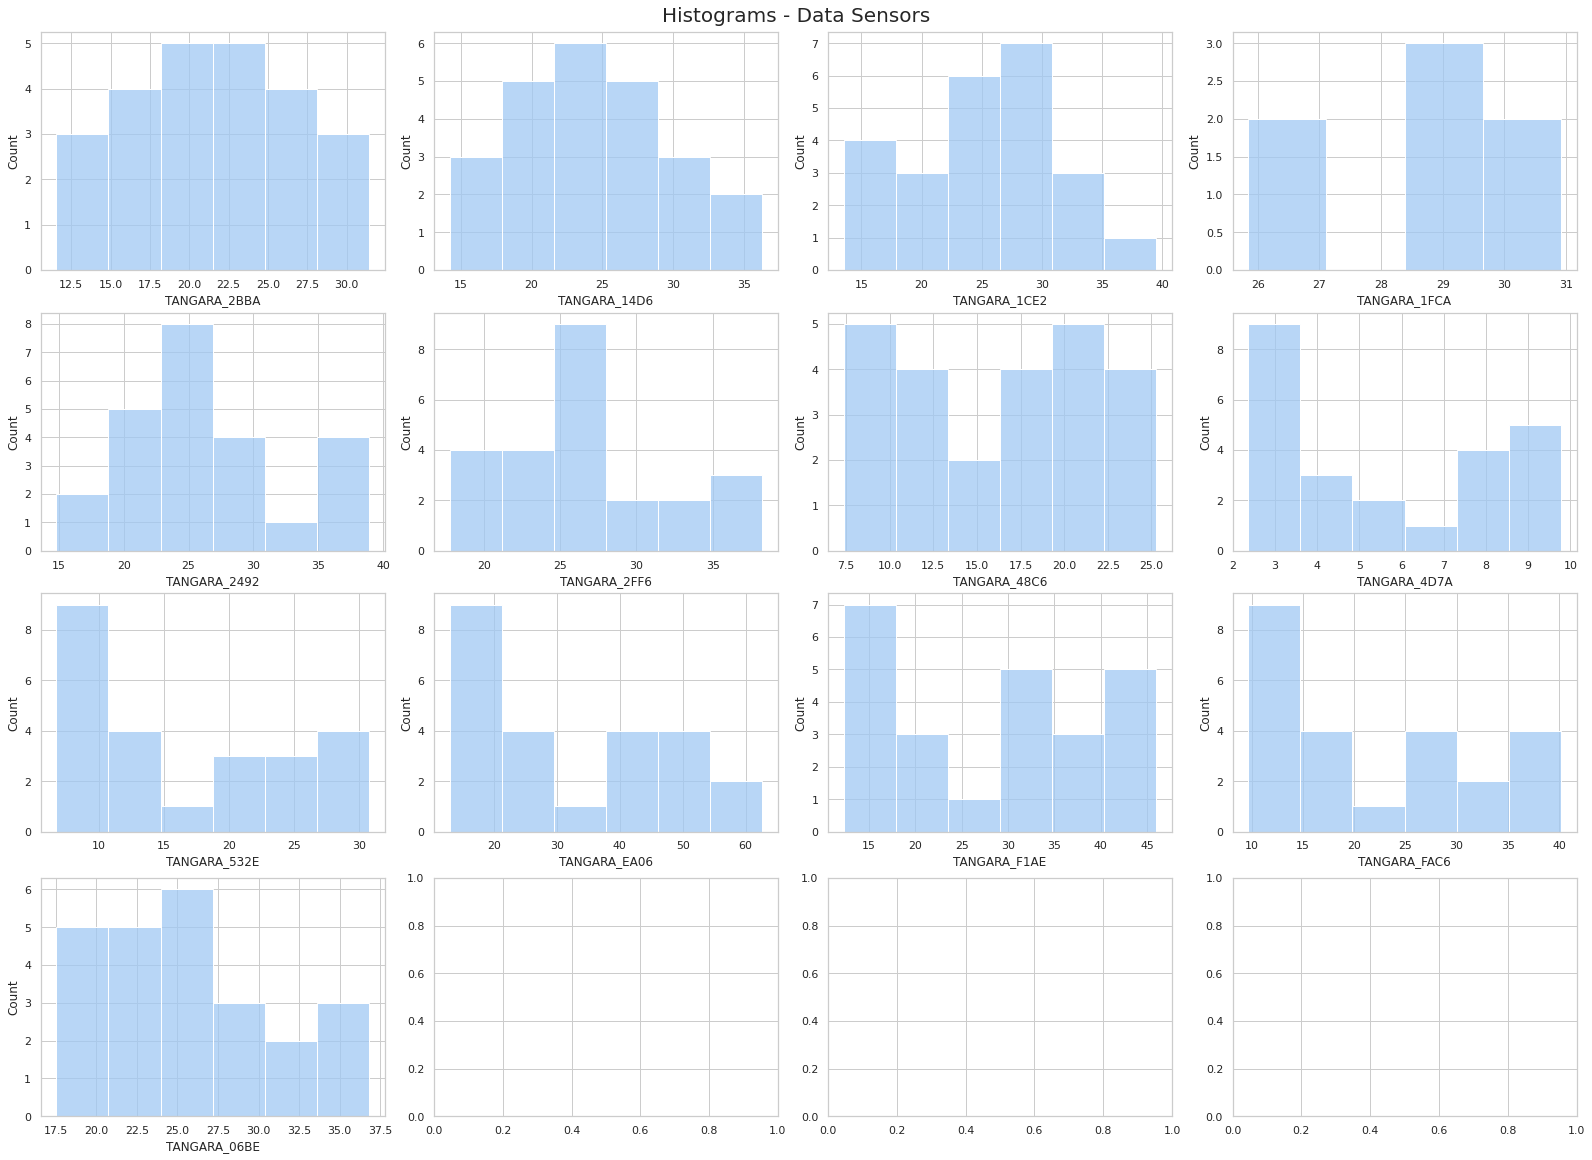

In [6]:
# Plot Histograms
histplots(pm25_last_hour)

In [7]:
# Plot Boxplots
def boxplots(data_sensors):
    # Canvas
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)
    fig.suptitle('Boxplots - Data Sensors', fontsize=20)
    # Plot
    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.boxplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]], orient="h", x=data_sensors[data_sensors.columns[k]])
            k += 1

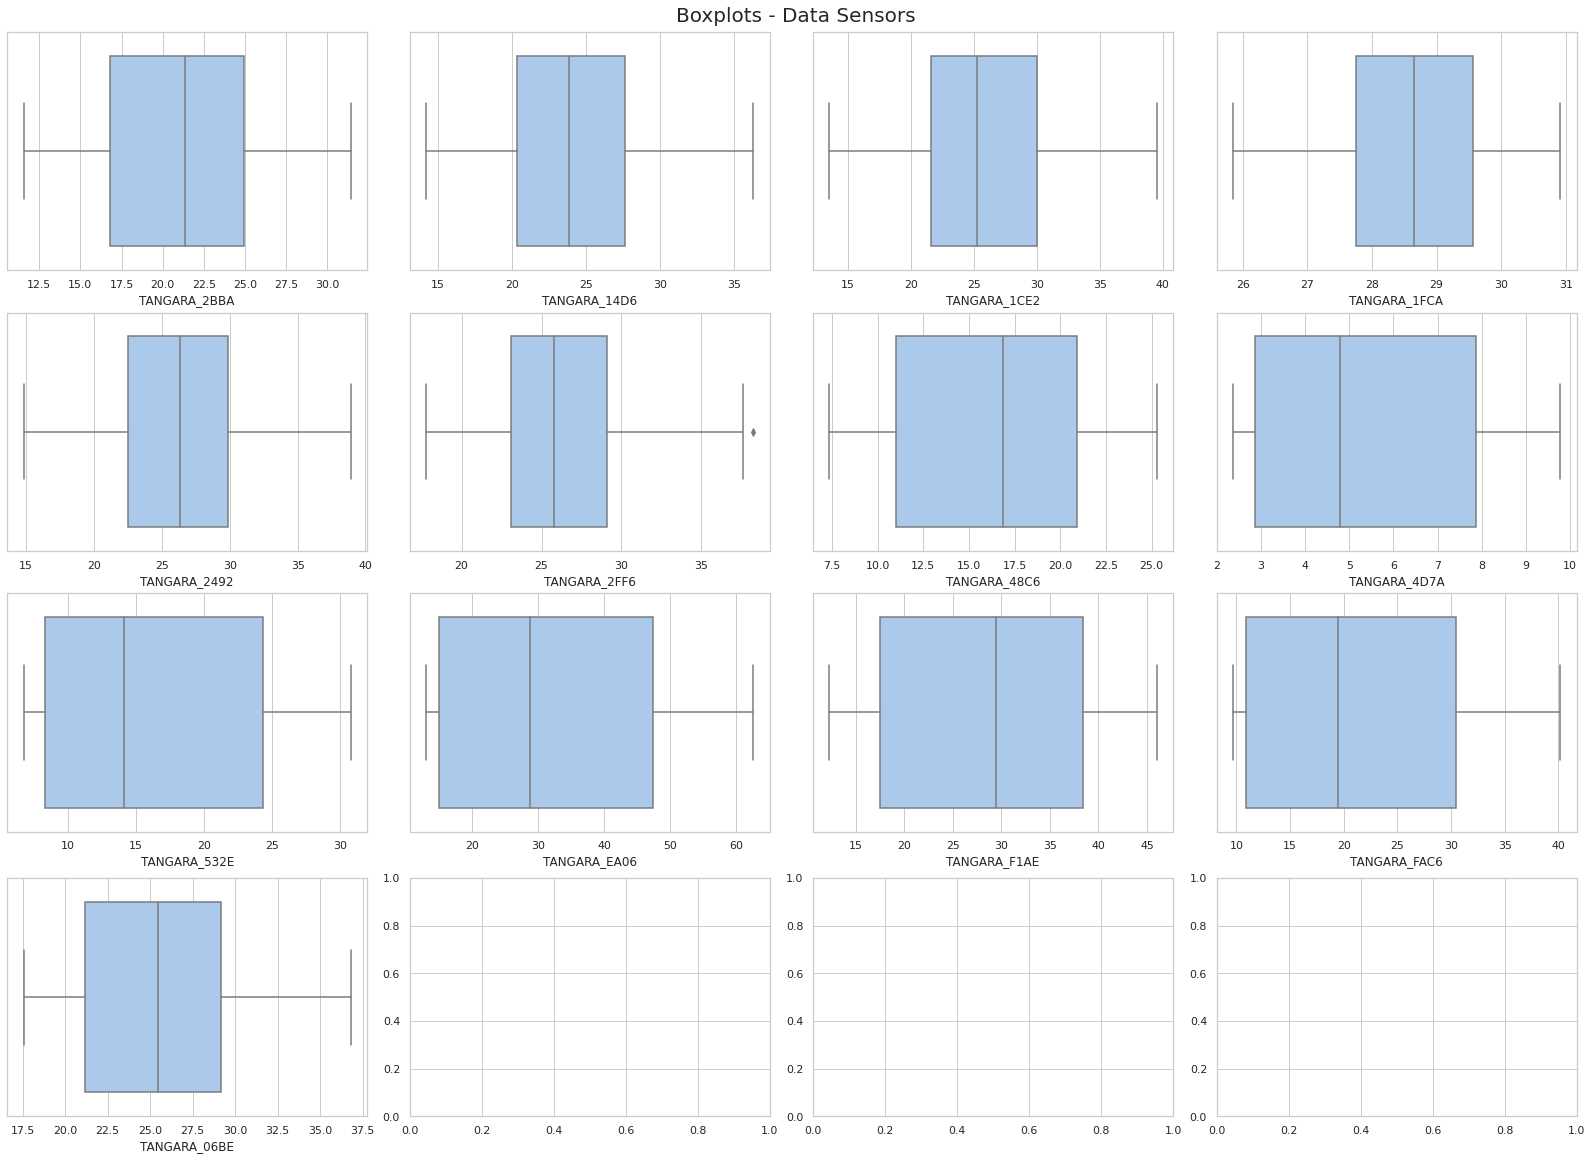

In [8]:
# Plot Boxplots
boxplots(pm25_last_hour)

In [9]:
# Get pm25 resample mean last 8 hours
def resample_pm25_last_8h(data_sensors):
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    return data_sensors.resample('8H', on='DATETIME', origin='end').mean().reset_index()#.median().reset_index()

In [10]:
# PM25 Last Hour
pm25_last_hour.tail()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
19,2022-09-06 09:34:30-05:00,29.820513,31.974138,34.698276,NaN,32.991379,35.735043,24.156522,9.745283,30.801802,62.641509,44.938053,40.179245,34.655172
20,2022-09-06 10:34:30-05:00,31.416667,36.269565,39.508475,NaN,36.598291,38.241667,23.649573,9.700000,26.044248,52.949580,41.711864,35.462185,36.805085
21,2022-09-06 11:34:30-05:00,28.915966,33.952381,32.826087,NaN,38.922414,37.605042,24.358974,9.773913,27.160714,54.017391,40.483051,35.666667,35.855932
22,2022-09-06 12:34:30-05:00,24.470588,25.634783,27.256410,NaN,35.224138,34.059829,21.915254,9.678261,26.982456,54.187500,37.872881,34.880734,32.076271
23,2022-09-06 13:34:30-05:00,24.850000,28.538462,29.940171,NaN,35.232143,33.213675,20.382609,9.745763,27.508929,54.762712,40.085470,35.401709,31.517241


In [11]:
# PM25 Last 8 Hours
pm25_last_8h = resample_pm25_last_8h(pm25_last_hour)
pm25_last_8h.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-05 21:34:30-05:00,20.450529,23.451424,25.085717,28.575207,22.697279,22.909232,13.676092,4.791453,13.017816,25.894800,29.063319,17.369896,23.365145
1,2022-09-06 05:34:30-05:00,16.983224,19.714861,18.941228,NaN,24.291987,23.714422,12.531423,3.381996,9.891306,19.070315,15.427135,13.594368,21.467174
2,2022-09-06 13:34:30-05:00,26.500840,29.497655,31.632161,NaN,33.025487,33.009407,22.769886,8.714268,25.822648,51.503171,40.498112,33.380570,32.133223


In [12]:
# Describe Data
pm25_last_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,7.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.325800,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
std,5.380139,5.648283,6.808559,1.746974,6.082966,5.856329,5.811612,2.842651,8.238649,16.973664,11.381201,10.409445,5.680177
min,11.553398,14.211864,13.525000,25.844828,14.803419,17.767241,7.359649,2.364407,6.721739,12.966667,12.274510,9.666667,17.550847
25%,16.777083,20.321429,21.560742,27.747356,22.531780,23.104627,10.987500,2.857110,8.268553,14.903484,17.463007,10.891277,21.148164
50%,21.372701,23.868506,25.281573,28.647059,26.317797,25.795109,16.845203,4.788846,14.142788,28.766810,29.453081,19.430172,25.438969
75%,24.925000,27.645209,29.999620,29.562477,29.885781,29.120089,20.939890,7.875724,24.363551,47.478992,38.426029,30.458387,29.193147
max,31.416667,36.269565,39.508475,30.914894,38.922414,38.241667,25.282051,9.773913,30.801802,62.641509,46.000000,40.179245,36.805085


In [13]:
# Describe Data
pm25_last_8h.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.325800,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
std,4.816871,4.936629,6.346527,NaN,5.560111,5.613356,5.610013,2.763095,8.441430,17.098988,12.551586,10.504682,5.689846
min,16.983224,19.714861,18.941228,28.575207,22.697279,22.909232,12.531423,3.381996,9.891306,19.070315,15.427135,13.594368,21.467174
25%,18.716876,21.583143,22.013473,28.575207,23.494633,23.311827,13.103757,4.086725,11.454561,22.482558,22.245227,15.482132,22.416160
50%,20.450529,23.451424,25.085717,28.575207,24.291987,23.714422,13.676092,4.791453,13.017816,25.894800,29.063319,17.369896,23.365145
75%,23.475684,26.474539,28.358939,28.575207,28.658737,28.361914,18.222989,6.752861,19.420232,38.698985,34.780715,25.375233,27.749184
max,26.500840,29.497655,31.632161,28.575207,33.025487,33.009407,22.769886,8.714268,25.822648,51.503171,40.498112,33.380570,32.133223


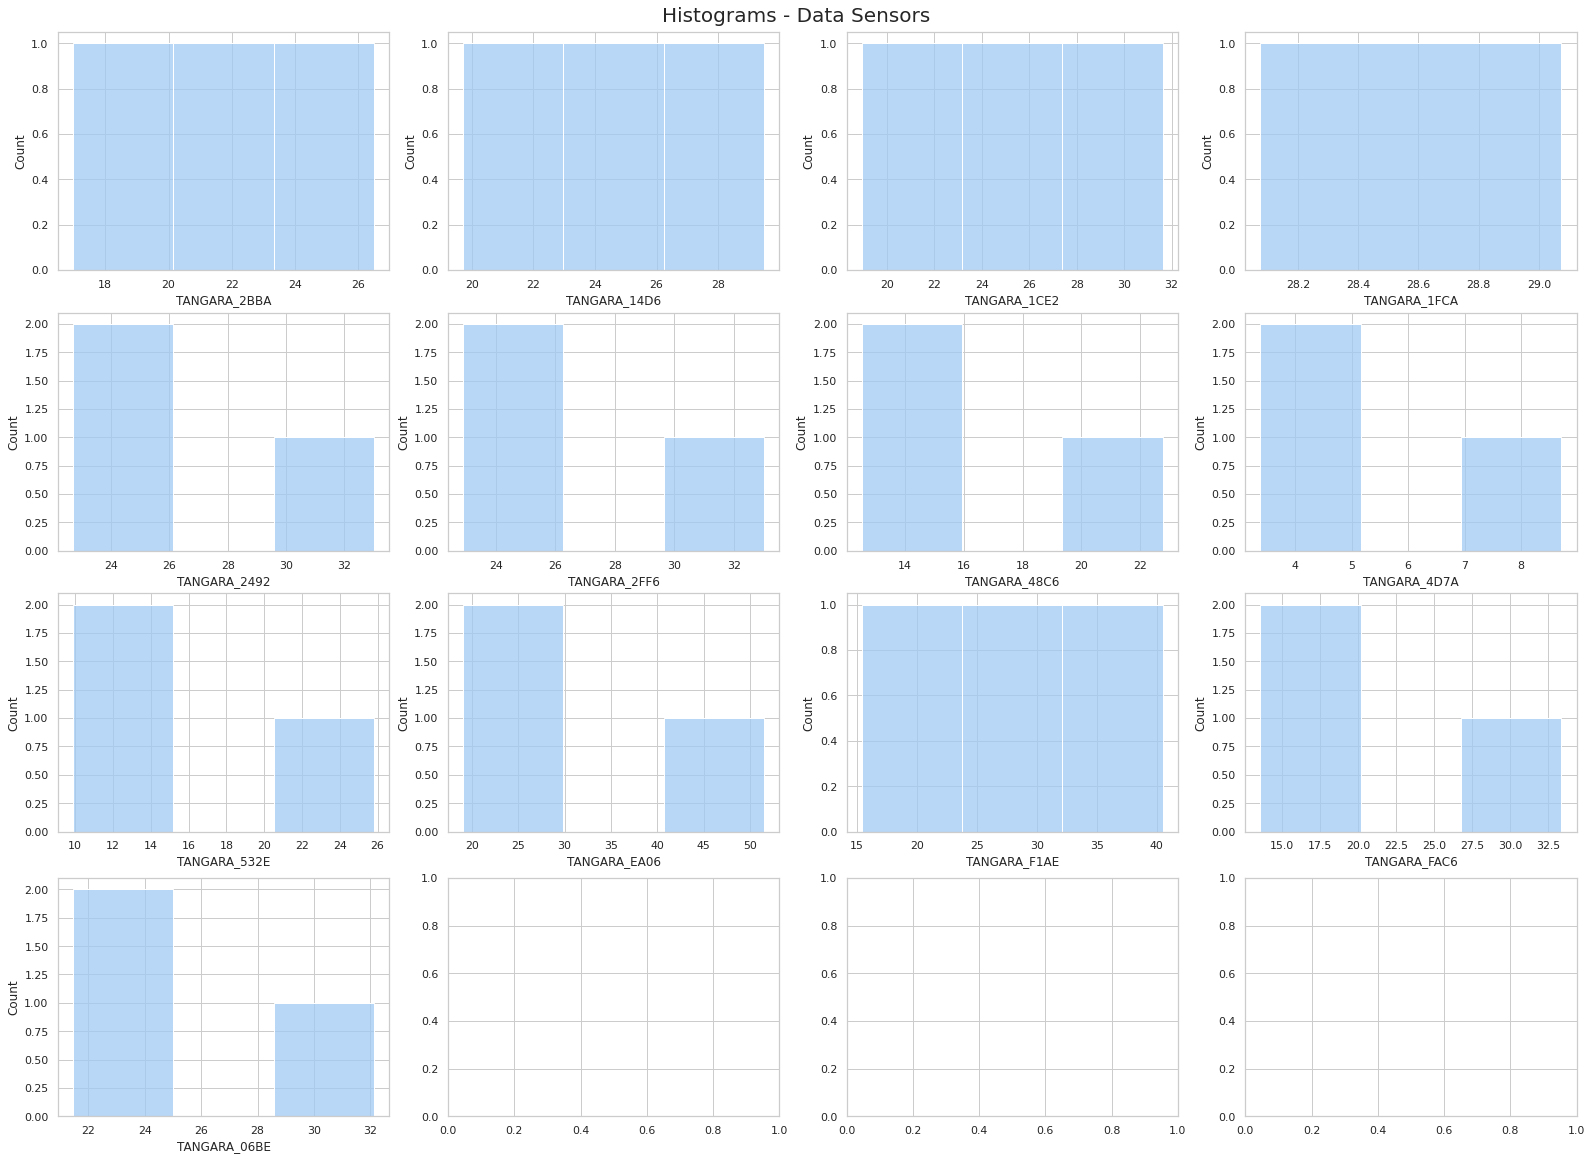

In [14]:
# Plot Histograms
histplots(pm25_last_8h)

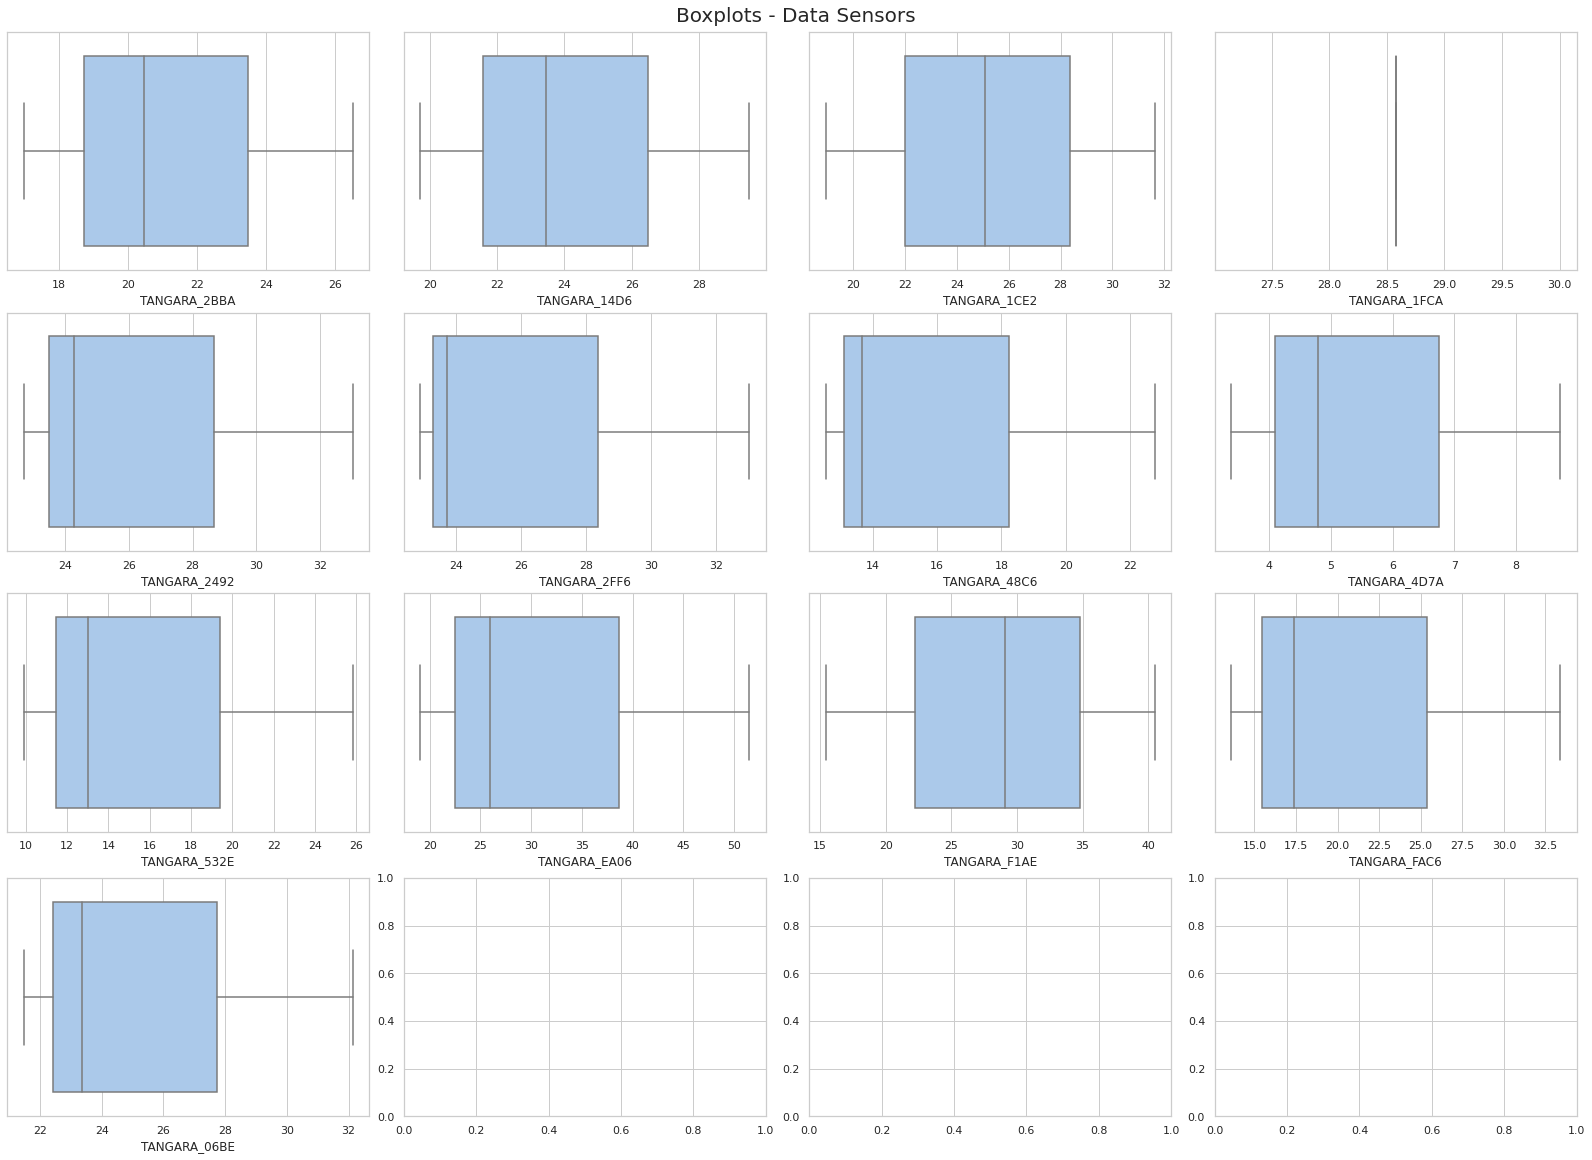

In [15]:
# Plot Boxplots
boxplots(pm25_last_8h)

In [16]:
# Plot Lineplots
def lineplots(data_sensors):
    fig, axes = plt.subplots(4, 4, figsize=(22, 16), constrained_layout=True)

    fig.suptitle('Timeline - Data Sensors', fontsize=20)

    size = len(data_sensors.describe().columns)
    k = 1
    for i in range(0, 4):
        for j in range(0, 4):
            if k <= size:
                sns.lineplot(ax=axes[i, j], data=data_sensors[data_sensors.columns[k]])
            k += 1

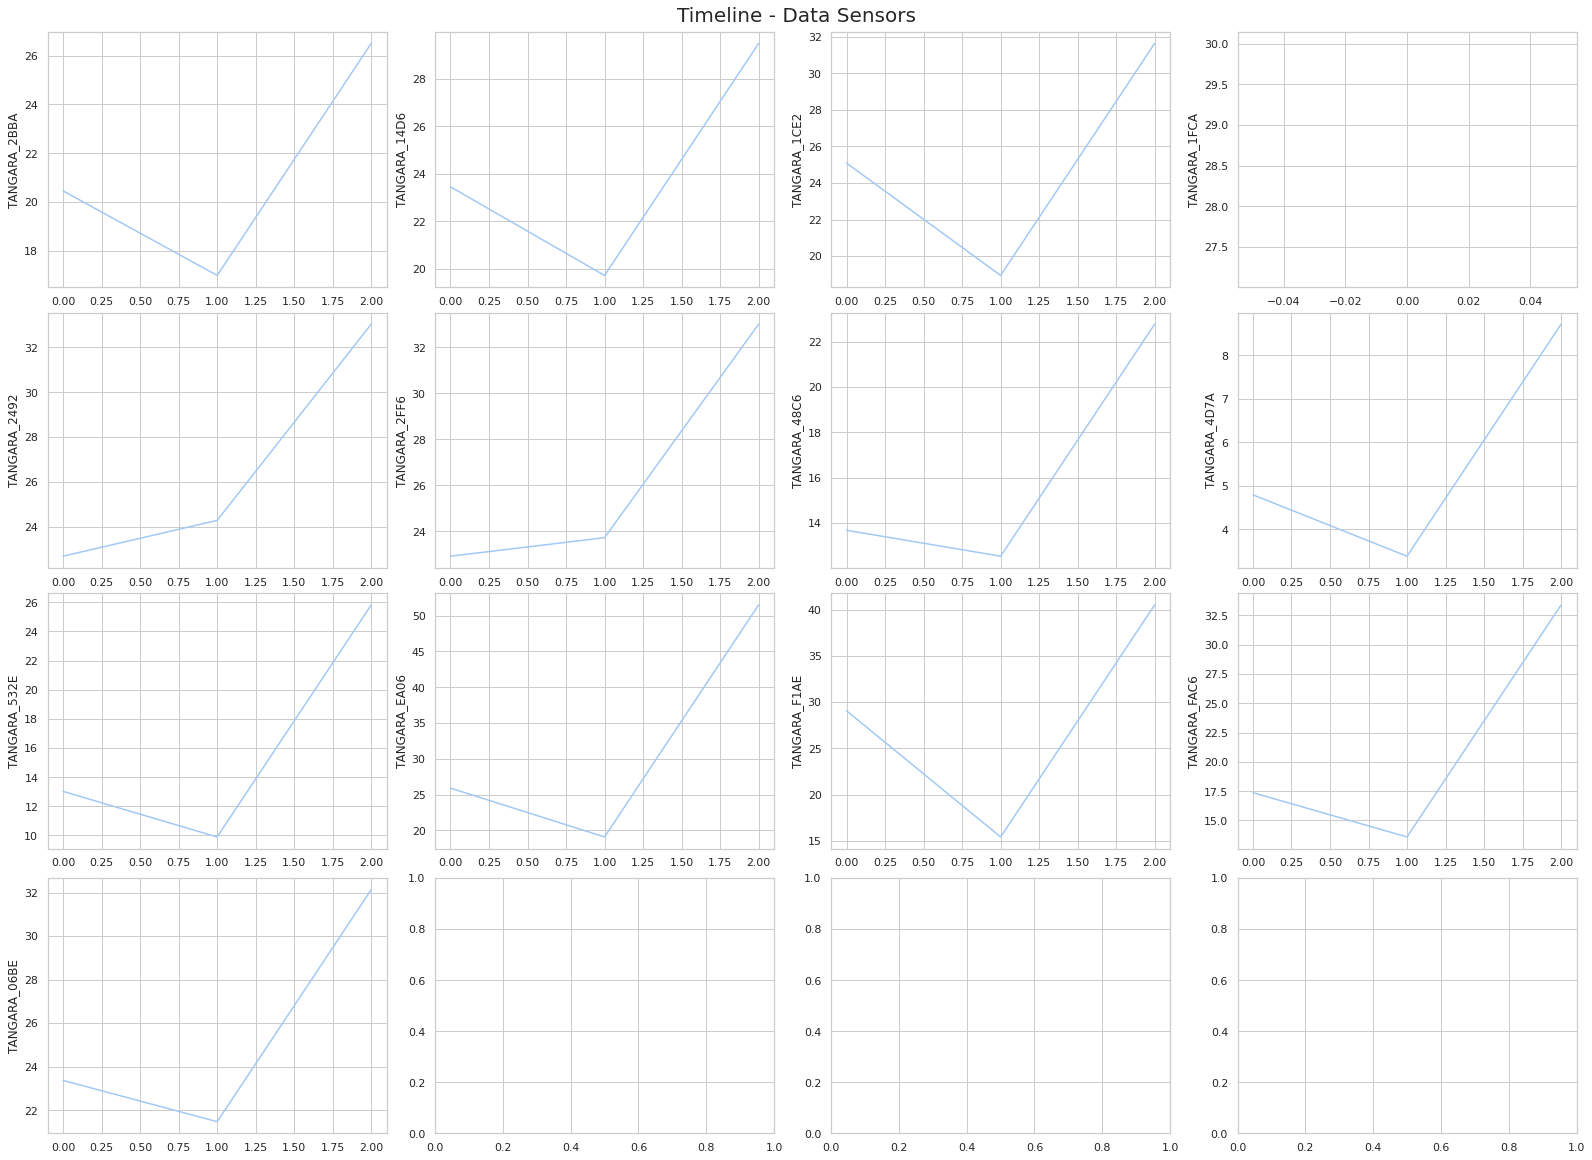

In [17]:
# Plot Lineplots
lineplots(pm25_last_8h)

In [18]:
# Save pm25_last_8h into Catalog
catalog.save('pm25_last_8h', pm25_last_8h)

2022-09-10 12:38:53,519 - kedro.io.data_catalog - INFO - Saving data to `pm25_last_8h` (CSVDataSet)...
